In [ ]:
# A brief intro about dataset

In [ ]:
'''
This dataset is created for prediction of Graduate Admissions from an Indian perspective.
The dataset contains several parameters which are considered important during the application for Masters Programs. The 
parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research 
Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted 
output gives them a fair idea about their chances for a particular university.
'''

In [ ]:
# Importing all necesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Loading dataset

In [3]:
adm=pd.read_csv("C://Users//acer//Desktop//1sem//python//graduate-admissions//Adm.csv")

In [ ]:
# Looking at first few rows

In [4]:
adm.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
# Looking at last few rows

In [5]:
adm.tail(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
# Looking at all columns

In [6]:
adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# looking at all columns types

In [7]:
adm.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
# Looking at the basic stats value 

In [8]:
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Checking for any presence of null values

In [9]:
adm.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Looking at the shape of dataset

In [10]:
adm.shape

(500, 9)

In [ ]:
# data visualization

In [ ]:
# Using value counts

In [11]:
adm.SOP.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [12]:
adm.CGPA.value_counts().sort_values(ascending=True)

7.57    1
9.53    1
8.98    1
9.05    1
8.25    1
       ..
8.56    7
8.45    7
8.54    7
8.76    9
8.00    9
Name: CGPA, Length: 184, dtype: int64

In [ ]:
# using groupby

In [14]:
adm.groupby("LOR ").size()

LOR 
1.0     1
1.5    11
2.0    46
2.5    50
3.0    99
3.5    86
4.0    94
4.5    63
5.0    50
dtype: int64

In [16]:
adm.groupby(["GRE Score","Chance of Admit "]).size()

GRE Score  Chance of Admit 
290        0.45                1
           0.47                1
293        0.64                1
294        0.46                1
           0.49                1
                              ..
340        0.90                1
           0.94                3
           0.95                1
           0.96                2
           0.97                2
Length: 396, dtype: int64

In [ ]:
# Lets check unique values under dependent variable

In [20]:
adm["Chance of Admit "].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [ ]:
# Using histogram

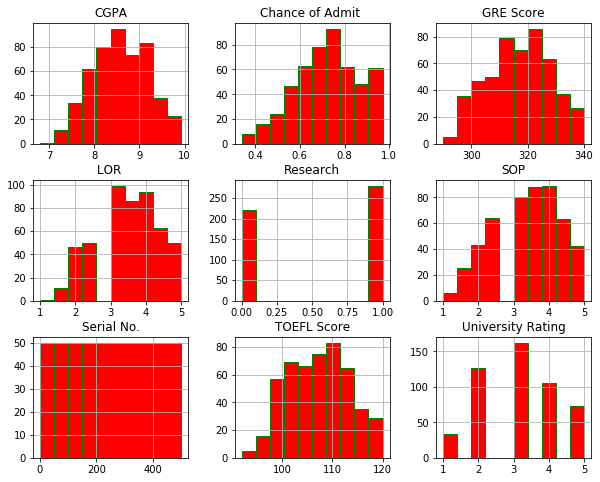

In [25]:
adm.hist(figsize=(10,8),color="red",edgecolor="green")
plt.show()

In [ ]:
# using pairplot

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


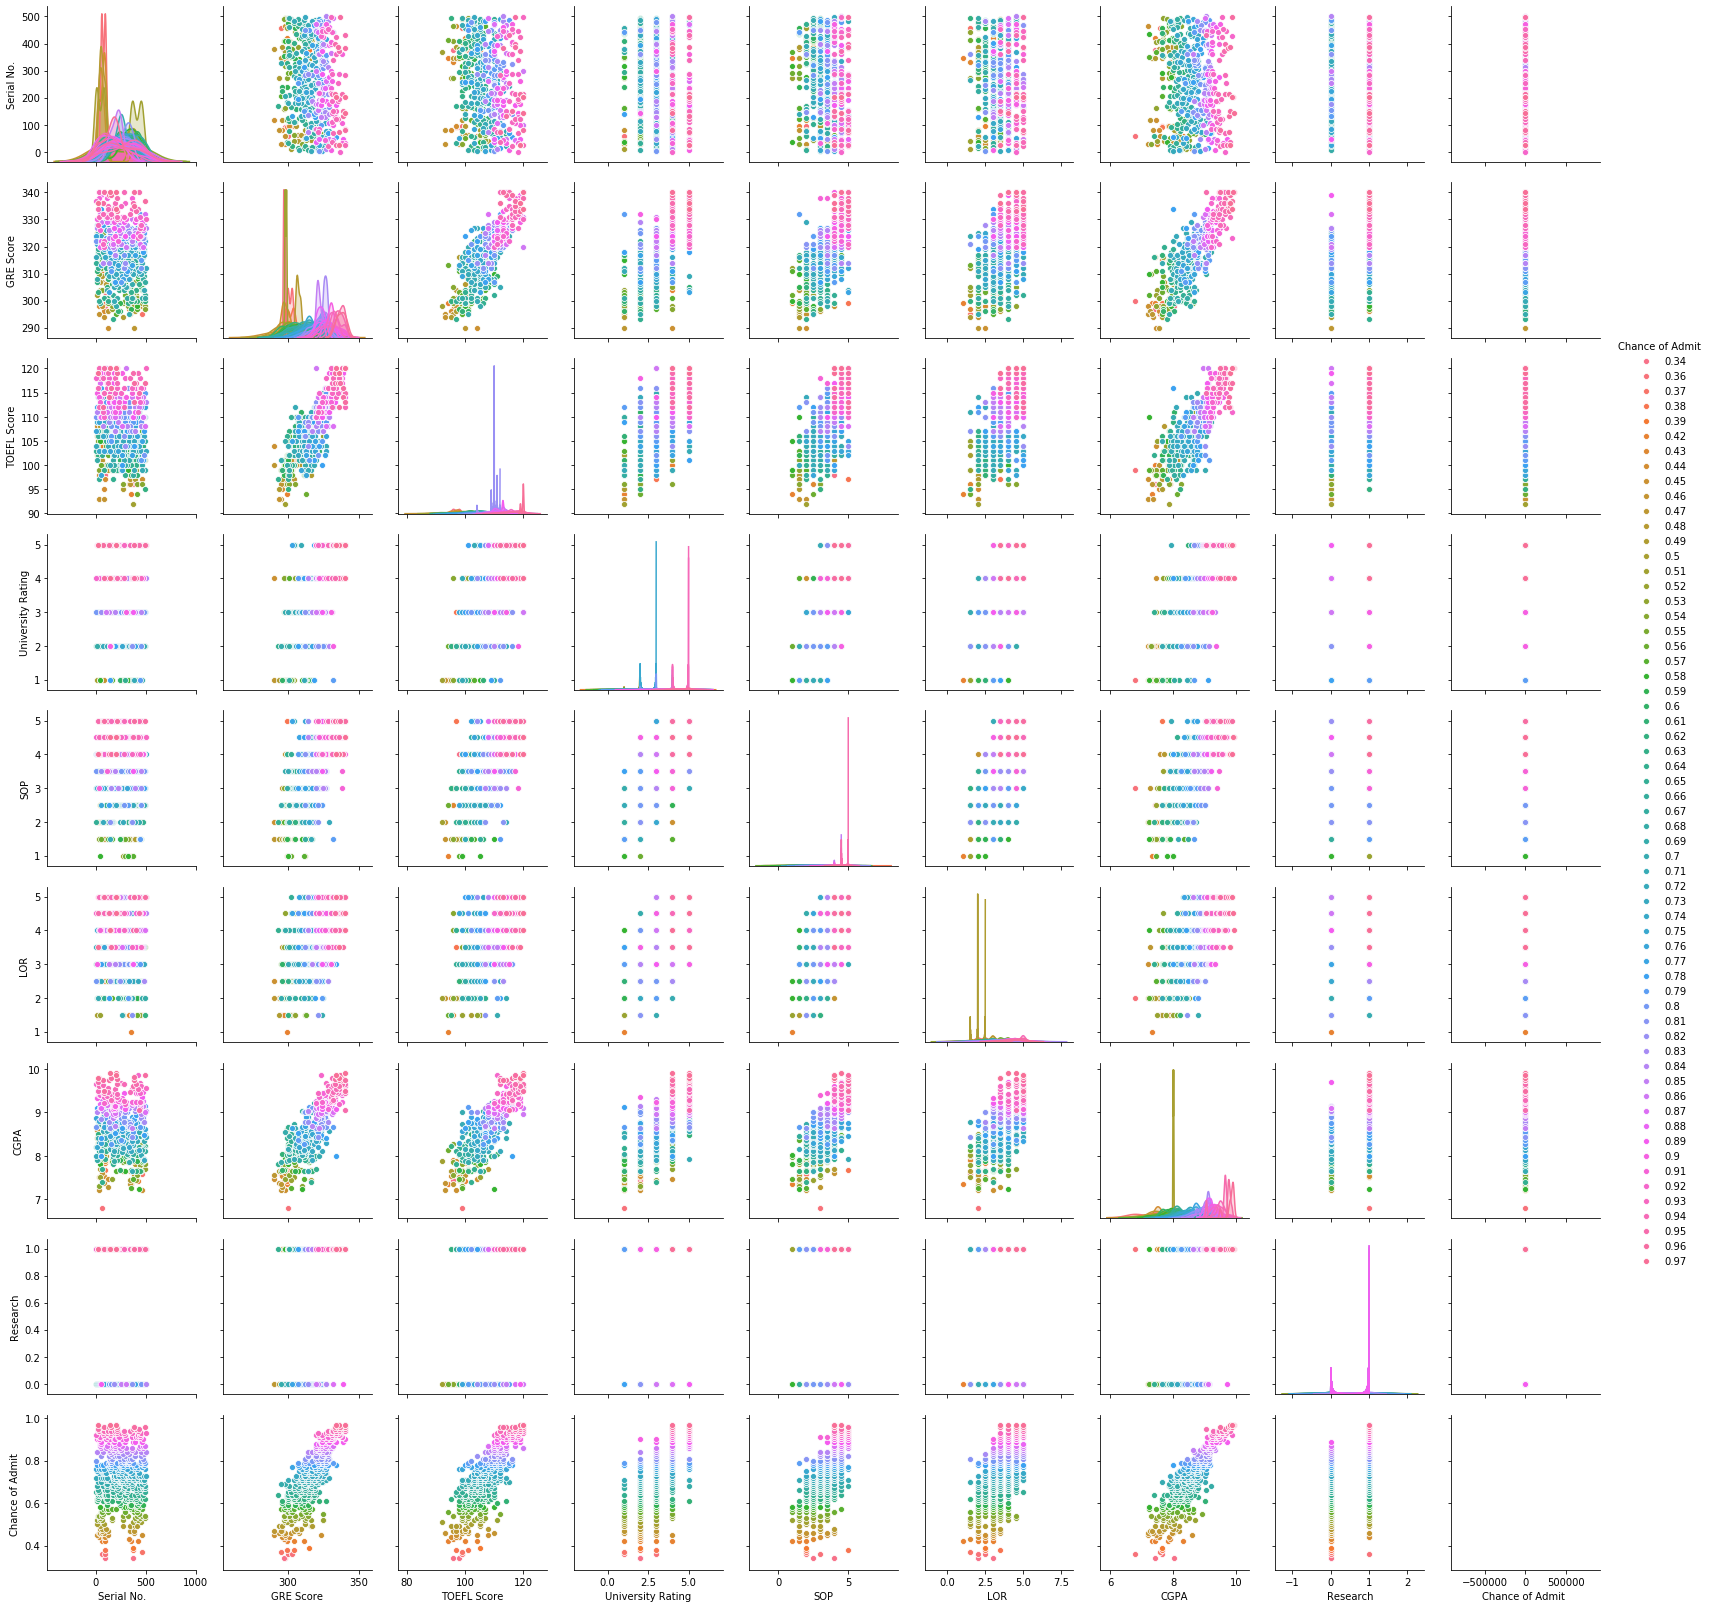

In [26]:
sns.pairplot(adm,hue="Chance of Admit ")

In [ ]:
# barplot

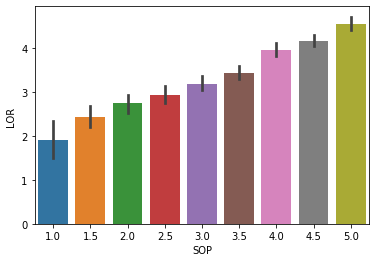

In [28]:
sns.barplot(x="SOP",y="LOR ",data=adm)

In [ ]:
# using scatter plot

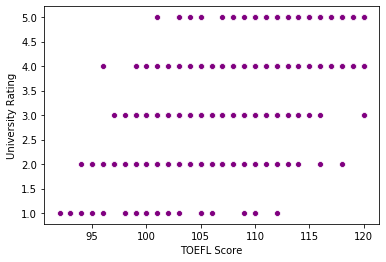

In [31]:
sns.scatterplot(x="TOEFL Score",y="University Rating",data=adm,color="purple")

In [ ]:
# scatter matrix

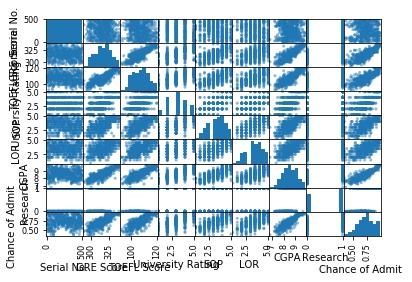

In [33]:
scatter_matrix(adm)
plt.show()

In [ ]:
# Barplot

<Figure size 720x576 with 0 Axes>

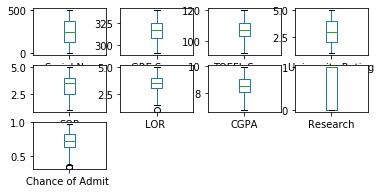

In [34]:
fig=plt.figure(figsize=(10,8))
adm.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [ ]:
# regplot

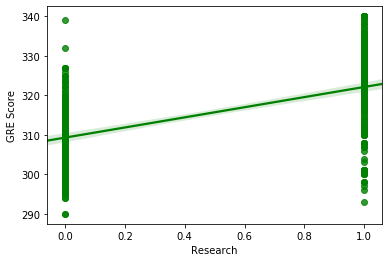

In [37]:
sns.regplot(x="Research",y="GRE Score",data=adm,color="green")

In [ ]:
# removing duplicates 

In [39]:
adm.drop_duplicates(inplace=True)

In [ ]:
# Lets check new shape of data

In [40]:
adm.shape

(500, 9)

In [ ]:
# heat map

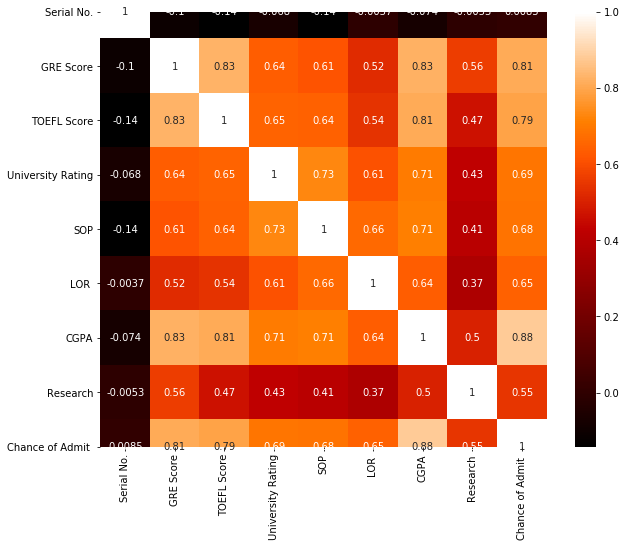

In [43]:
fig=plt.figure(figsize=(10,8))
adm_corr=adm.corr()
sns.heatmap(adm_corr,annot=True,cmap="gist_heat")

In [ ]:
# Dividing the dataset into dependent and independent variable

In [44]:
y=adm["Chance of Admit "]
x=adm.drop("Chance of Admit ",axis=1)

In [ ]:
# Dividing the dataset into training and testing set

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Lets check out whether we have divided our datat correctly

In [46]:
print("Shape of x_train is ",x_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of x_test is ",x_test.shape)
print("Shape of y_test is ",x_test.shape)

Shape of x_train is  (350, 8)
Shape of y_train is  (350,)
Shape of x_test is  (150, 8)
Shape of y_test is  (150, 8)


In [ ]:
# Applying ML algorithm

In [47]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [ ]:
# Comparing the predicted value with actual values and representing in dataframe

In [48]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93   0.928898
73     0.84   0.779184
374    0.39   0.586275
155    0.77   0.705202
104    0.74   0.805053
..      ...        ...
266    0.72   0.659028
23     0.95   0.948003
222    0.76   0.787777
261    0.71   0.643809
426    0.71   0.731731

[150 rows x 2 columns]


In [ ]:
# Evaluating model

In [52]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.04352655863808974
mean sq error: 0.003500684226487506
root mean sq error: 0.05916658031767178
r2 is : 0.8320375311635426


In [ ]:
# print the coefficients

In [53]:
print(lr.intercept_)
print(lr.coef_)

-1.4674309461768624
[9.20630330e-05 2.24172599e-03 3.90501709e-03 3.09838383e-03
 4.17061244e-03 1.33541631e-02 1.11776306e-01 1.91223174e-02]


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


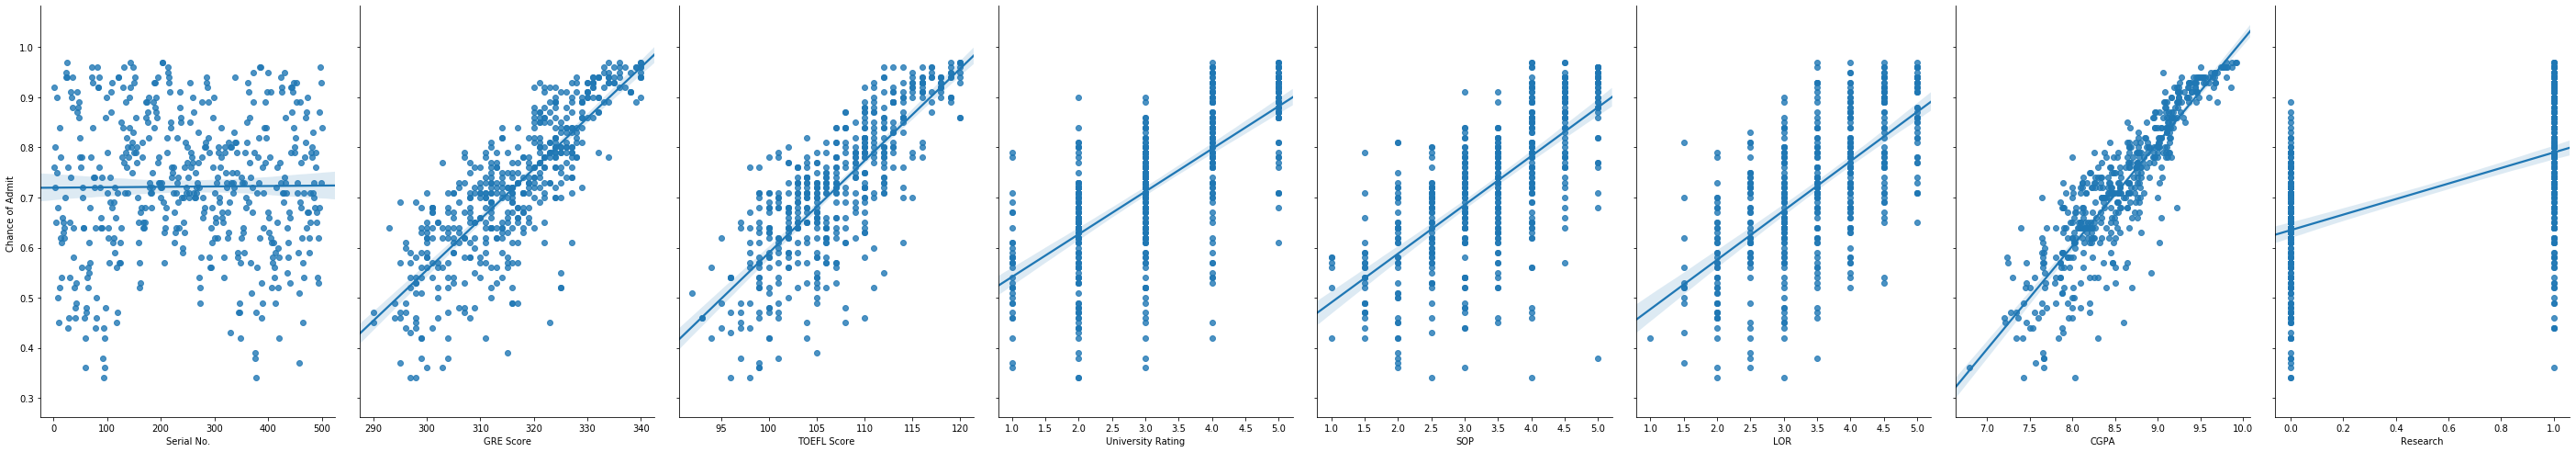

In [56]:
sns.pairplot(adm, x_vars=['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ', size=7, aspect=0.7, kind='reg')

In [62]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
prediction=dtr.predict(x_test)

In [63]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93       0.94
73     0.84       0.87
374    0.39       0.61
155    0.77       0.84
104    0.74       0.84
..      ...        ...
266    0.72       0.66
23     0.95       0.96
222    0.76       0.79
261    0.71       0.73
426    0.71       0.70

[150 rows x 2 columns]


In [64]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.05486666666666667
mean sq error: 0.006481999999999999
root mean sq error: 0.08051086883148137
r2 is : 0.6889943072385245


In [68]:
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(x_train,y_train)
prediction=rfr.predict(x_test)

In [69]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93      0.941
73     0.84      0.744
374    0.39      0.666
155    0.77      0.744
104    0.74      0.784
..      ...        ...
266    0.72      0.705
23     0.95      0.940
222    0.76      0.728
261    0.71      0.681
426    0.71      0.703

[150 rows x 2 columns]


In [70]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.04256
mean sq error: 0.0036238133333333328
root mean sq error: 0.0601981173570514
r2 is : 0.8261298092916376


In [72]:
svr=SVR(gamma="auto")
svr.fit(x_train,y_train)
prediction=svr.predict(x_test)

In [73]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93   0.718817
73     0.84   0.718228
374    0.39   0.718390
155    0.77   0.718381
104    0.74   0.723571
..      ...        ...
266    0.72   0.718389
23     0.95   0.718391
222    0.76   0.719023
261    0.71   0.718390
426    0.71   0.718389

[150 rows x 2 columns]


In [74]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.10991655043434799
mean sq error: 0.01912105790323303
root mean sq error: 0.1382789134439269
r2 is : 0.0825736100698432


In [75]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [76]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93      0.840
73     0.84      0.624
374    0.39      0.748
155    0.77      0.664
104    0.74      0.798
..      ...        ...
266    0.72      0.664
23     0.95      0.818
222    0.76      0.812
261    0.71      0.754
426    0.71      0.654

[150 rows x 2 columns]


In [77]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.06042666666666668
mean sq error: 0.006696853333333336
root mean sq error: 0.08183430413545004
r2 is : 0.6786856664215781


In [78]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
prediction=abr.predict(x_test)

In [79]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
361    0.93   0.901613
73     0.84   0.763077
374    0.39   0.606000
155    0.77   0.721905
104    0.74   0.780000
..      ...        ...
266    0.72   0.681507
23     0.95   0.901000
222    0.76   0.755439
261    0.71   0.655441
426    0.71   0.718462

[150 rows x 2 columns]


In [80]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2 is :",r2_score(y_test,prediction))

mean abs error: 0.046348207091487674
mean sq error: 0.003623536996063201
root mean sq error: 0.060195822081463436
r2 is : 0.8261430679254131


In [ ]:
'''
Here after applying many ML algorithm we can conclude that Randomforest Regressor has given us minimum error hence accuracy 
is maximum.
'''  
